# Melhorando a saúde mental dos estudantes durante o ensino remoto

## Identificação do problema:

## Pesquisa:

#### Terminologia:
* Saúde Mental: A Organização Mundial da Saúde (OMS) define saúde mental como “um estado de bem-estar mental que permite às pessoas lidar com os momentos estressantes da vida, desenvolver todas as suas habilidades, aprender e trabalhar bem e contribuir para a melhoria de sua comunidade”.
* O que determina a saúde mental: 
* Fatores individuais: Capacidade de administrar os pensamentos, as emoções, os comportamentos e as interações com os outros
* Fatores coletivos: Sociais, culturais, econômicos, políticos e ambientais, como as políticas nacionais, a proteção social, padrões de vida, as condições de trabalho e o apoio comunitário.
* Fatores biológicos: Estresse, genética, nutrição e infecções perinatais.
* Ensino Remoto Emergencial (ERE): Ocorre num tempo síncrono (acompanhando os princípios do ensino presencial), com videoaula, aula expositiva por sistema de webconferência, e as atividades seguem durante a semana no espaço de um ambiente virtual de aprendizagem (AVA) de forma assíncrona
* GAD-7 (General Anxiety Disorder-7): A GAD-7 é uma escala criada por Spitzer et al., em 2005, com objetivo de ser uma medida breve de autorrelato para avaliação de casos prováveis de TAG (Transtorno de Ansiedade Generalizada). A escala é composta por 7 itens e seus itens estão dispostos em 4 pontos, que variam entre 0 (nenhuma vez) a 3 (quase todos os dias) em escala do tipo Likert. Ao rastrear transtornos de ansiedade, uma pontuação de 10 ou mais representa um ponto de corte razoável para identificar casos prováveis de transtorno de ansiedade generalizada.


# Manipulação do Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("dataset.tsv", sep = "\t")
df.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,uf,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.0,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,SP,04235-090,1,1,1,1,1,1,1,9
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.0,1,2,3,1,2,Rua Marechal Marques Porto,...,SP,03906-020,0,1,1,1,1,1,1,10
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.0,1,1,3,1,9,Rua Vinte de Março,...,SP,02326-115,1,0,1,1,1,1,1,10
3,RA55000004,Kaiuan Félix,19,243.0,1,1,3,1,9,Rua João Pires,...,SP,03168-060,1,1,1,1,1,1,1,9
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.0,1,1,3,1,6,Rua São João,...,SP,02920-050,1,1,1,1,1,1,1,9


In [3]:
# Limpeza das colunas que não são relevantes
df.drop(["matrícula", "nome", "cor", "sexo", "escola", "cod_curso", "logradouro", "numero", "bairro", "cidade", "uf", "cep"], axis=1, inplace=True)
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,19,418.00,3,1,1,1,1,1,1,1,9
1,19,279.00,3,0,1,1,1,1,1,1,10
2,19,87.00,3,1,0,1,1,1,1,1,10
3,19,243.00,3,1,1,1,1,1,1,1,9
4,19,348.00,3,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...
495,31,22669.71,2,2,2,2,1,1,1,1,1
496,45,229643.80,1,2,2,2,2,2,2,2,1
497,32,572939.98,5,2,2,2,2,1,1,1,1
498,34,898004.00,5,1,1,1,1,1,1,1,0


# Remoção dos outliers de renda

In [4]:
df["renda"] = df[df["renda"] <= 22000]["renda"]
df = df.dropna()
df.dropna()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,19,418.00,3,1,1,1,1,1,1,1,9
1,19,279.00,3,0,1,1,1,1,1,1,10
2,19,87.00,3,1,0,1,1,1,1,1,10
3,19,243.00,3,1,1,1,1,1,1,1,9
4,19,348.00,3,1,1,1,1,1,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0
491,29,17336.61,5,2,2,2,2,2,2,2,1
492,33,20678.88,1,2,2,2,2,2,2,1,0
493,48,16439.16,2,2,2,2,2,2,2,1,0


# Matriz de correlação inicial

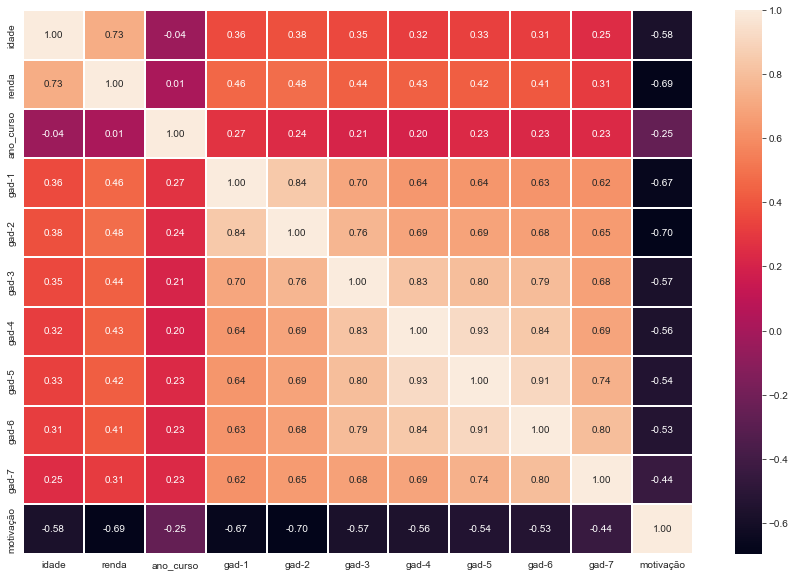

In [5]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()


* Conclusão: há forte correlação entre GAD-7/renda/idade e motivação

# Adiciona coluna do score total

In [6]:
df['total score'] = df.iloc[:, 3:9].sum(axis=1)
df

/var/folders/j7/3v2f_9hs41gfrvgzvkcdrph00000gn/T/ipykernel_31483/4043324011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total score'] = df.iloc[:, 3:9].sum(axis=1)


,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
0,19,418.00,3,1,1,1,1,1,1,1,9,6
1,19,279.00,3,0,1,1,1,1,1,1,10,5
2,19,87.00,3,1,0,1,1,1,1,1,10,5
3,19,243.00,3,1,1,1,1,1,1,1,9,6
4,19,348.00,3,1,1,1,1,1,1,1,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12
491,29,17336.61,5,2,2,2,2,2,2,2,1,12
492,33,20678.88,1,2,2,2,2,2,2,1,0,12
493,48,16439.16,2,2,2,2,2,2,2,1,0,12


# Divisão por faixas salarias de acordo com o IBGE

In [7]:
sal_min = 1302
def classes(renda):
    if renda <= sal_min:
        return "E"
    elif renda <= (2*sal_min):
        return "D"
    elif renda <= (3*sal_min):
        return "C"
    elif renda <= (5*sal_min):
        return "B"
    elif renda >= (5*sal_min):
        return "A"
df['classe'] = df['renda'].apply(classes)

/var/folders/j7/3v2f_9hs41gfrvgzvkcdrph00000gn/T/ipykernel_31483/2319030816.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classe'] = df['renda'].apply(classes)


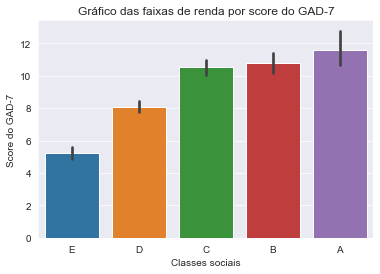

In [8]:
graph1 = sns.barplot(data=df, x="classe", y="total score")
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Classes sociais")
plt.ylabel("Score do GAD-7")
plt.title("Gráfico das faixas de renda por score do GAD-7")
plt.show()

* Conclusão: quanto maior a classe social, maior o score do GAD-7

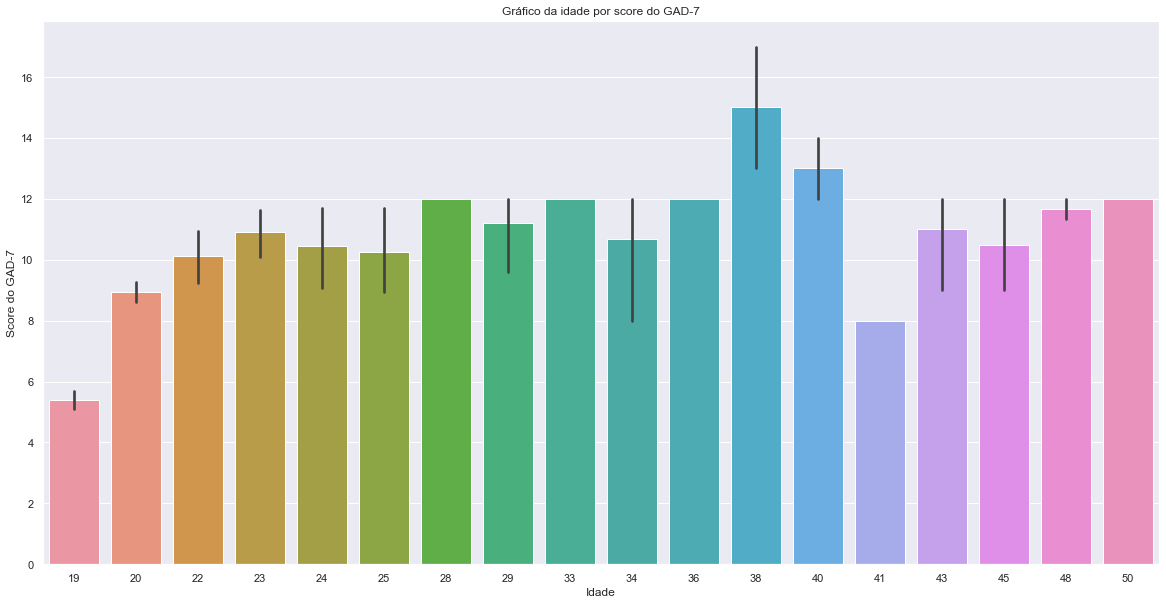

In [9]:
graph2 = sns.barplot(data=df, x="idade", y="total score")
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Idade")
plt.ylabel("Score do GAD-7")
plt.title("Gráfico da idade por score do GAD-7")
plt.show()

* Conclusão: pessoas de idade mais avançada tendem a ter um score do GAD-7 mais elevado

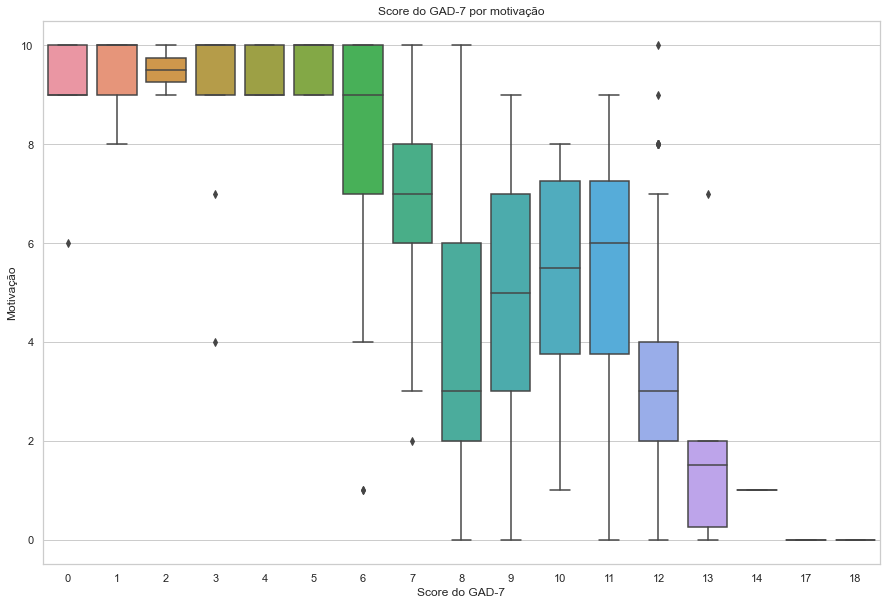

In [10]:
sns.set_style("whitegrid") 
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="total score", y="motivação")
plt.title('Score do GAD-7 por motivação')
plt.xlabel('Score do GAD-7')
plt.ylabel('Motivação')
plt.show()



* Conclusão: a motivação é inversamente proporcional ao score do GAD-7

# Filtra as colunas com pontuação de 10 ou mais, que representa um ponto de corte razoável para identificar casos prováveis de transtorno de ansiedade generalizada.


In [11]:
df["total score"] = df[df["total score"] >= 10]["total score"]
df = df.dropna()
df.dropna()

/var/folders/j7/3v2f_9hs41gfrvgzvkcdrph00000gn/T/ipykernel_31483/980856186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total score"] = df[df["total score"] >= 10]["total score"]


,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score,classe
62,19,792.99,3,1,2,2,2,2,2,2,9,11.0,E
72,19,821.99,3,2,2,2,2,2,2,2,9,12.0,E
121,19,722.99,3,2,2,2,2,2,2,2,10,12.0,E
157,19,1901.98,3,2,2,2,1,1,2,2,6,10.0,D
163,19,1402.99,3,2,2,2,1,1,2,2,6,10.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12.0,A
491,29,17336.61,5,2,2,2,2,2,2,2,1,12.0,A
492,33,20678.88,1,2,2,2,2,2,2,1,0,12.0,A
493,48,16439.16,2,2,2,2,2,2,2,1,0,12.0,A


* Conclusão: 159 alunos em prováveis condições de transtorno de ansiedade generalizada

In [12]:
df.drop(["classe"], axis=1, inplace=True)
df

/var/folders/j7/3v2f_9hs41gfrvgzvkcdrph00000gn/T/ipykernel_31483/1436832087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["classe"], axis=1, inplace=True)


,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
62,19,792.99,3,1,2,2,2,2,2,2,9,11.0
72,19,821.99,3,2,2,2,2,2,2,2,9,12.0
121,19,722.99,3,2,2,2,2,2,2,2,10,12.0
157,19,1901.98,3,2,2,2,1,1,2,2,6,10.0
163,19,1402.99,3,2,2,2,1,1,2,2,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12.0
491,29,17336.61,5,2,2,2,2,2,2,2,1,12.0
492,33,20678.88,1,2,2,2,2,2,2,1,0,12.0
493,48,16439.16,2,2,2,2,2,2,2,1,0,12.0


# Normalização dos dados

In [13]:
obj_normalizacao = MinMaxScaler().fit(df)
df_normalizado = obj_normalizacao.transform(df)
df_normalizado

array([[0.        , 0.00337396, 0.5       , ..., 0.5       , 0.9       ,
        0.125     ],
       [0.        , 0.00477174, 0.5       , ..., 0.5       , 0.9       ,
        0.25      ],
       [0.        , 0.        , 0.5       , ..., 0.5       , 1.        ,
        0.25      ],
       ...,
       [0.4516129 , 0.96186175, 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.93548387, 0.75750983, 0.25      , ..., 0.        , 0.        ,
        0.25      ],
       [0.32258065, 1.        , 0.75      , ..., 0.5       , 0.        ,
        0.25      ]])

# Transformando de volta em um DataFrame

In [14]:
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ["idade", "renda", "ano_curso", "gad-1", "gad-2", "gad-3", "gad-4", "gad-5", "gad-6", "gad-7",
                          "motivacao", "total score"]
df_normalizado.head()

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivacao,total score
0,0.0,0.003374,0.5,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.9,0.125
1,0.0,0.004772,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.9,0.250
2,0.0,0.000000,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,1.0,0.250
3,0.0,0.056827,0.5,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6,0.000
4,0.0,0.032776,0.5,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6,0.000


# Matriz de correlação após normalização com total score

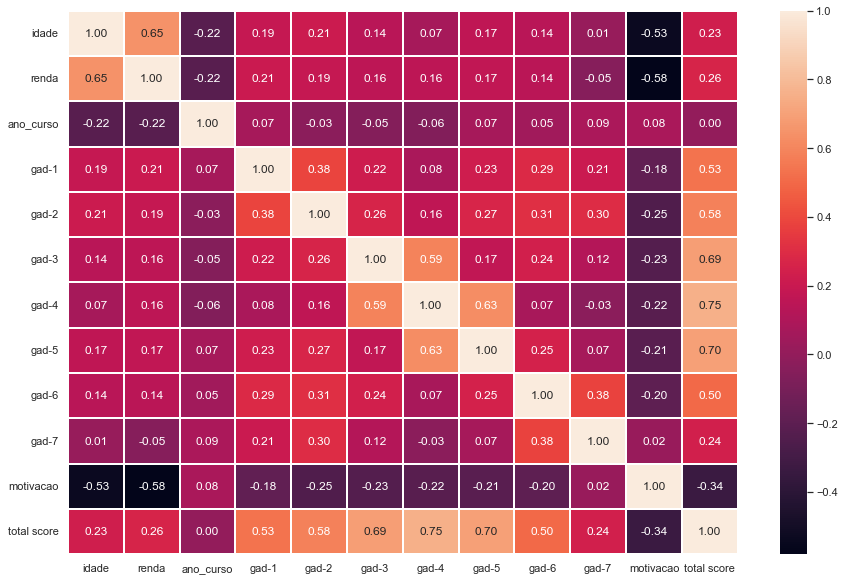

In [15]:

corr_matrix = df_normalizado.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()

* Conclusão: há forte correlação entre idade/renda e motivação, além do gad-3 e gad-4

In [16]:
df_normalizado.drop(["total score"], axis=1, inplace=True)
df_normalizado

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivacao
0,0.000000,0.003374,0.50,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.9
1,0.000000,0.004772,0.50,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.9
2,0.000000,0.000000,0.50,0.5,0.0,0.5,0.5,0.5,0.5,0.5,1.0
3,0.000000,0.056827,0.50,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6
4,0.000000,0.032776,0.50,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...
154,0.483871,0.469180,0.75,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.0
155,0.322581,0.800766,1.00,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.1
156,0.451613,0.961862,0.00,0.5,0.0,0.5,0.5,0.5,0.5,0.0,0.0
157,0.935484,0.757510,0.25,0.5,0.0,0.5,0.5,0.5,0.5,0.0,0.0


# Matriz de correlação após normalização sem total score

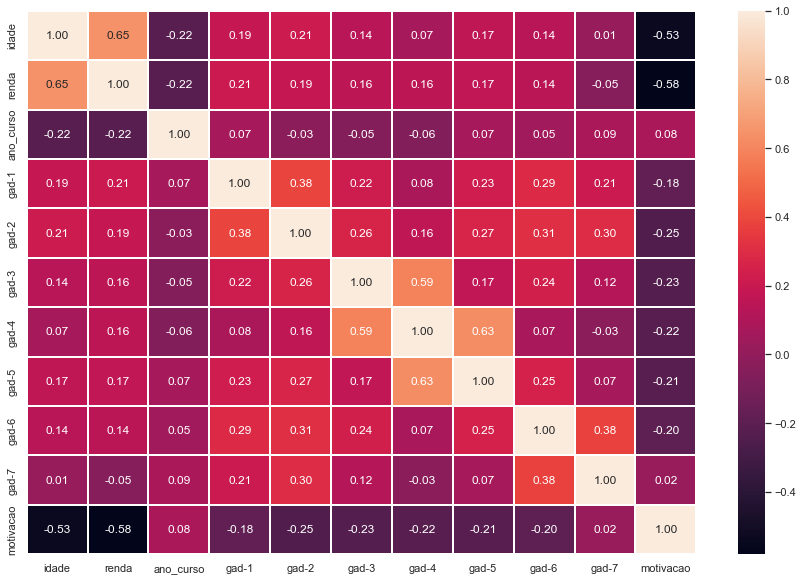

In [17]:
plt.figure(figsize=(15, 10))
corr_matrix = df_normalizado.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=2)
plt.show()

In [18]:
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
62,19,792.99,3,1,2,2,2,2,2,2,9,11.0
72,19,821.99,3,2,2,2,2,2,2,2,9,12.0
121,19,722.99,3,2,2,2,2,2,2,2,10,12.0
157,19,1901.98,3,2,2,2,1,1,2,2,6,10.0
163,19,1402.99,3,2,2,2,1,1,2,2,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12.0
491,29,17336.61,5,2,2,2,2,2,2,2,1,12.0
492,33,20678.88,1,2,2,2,2,2,2,1,0,12.0
493,48,16439.16,2,2,2,2,2,2,2,1,0,12.0


In [19]:
df_normalizado

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivacao
0,0.000000,0.003374,0.50,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.9
1,0.000000,0.004772,0.50,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.9
2,0.000000,0.000000,0.50,0.5,0.0,0.5,0.5,0.5,0.5,0.5,1.0
3,0.000000,0.056827,0.50,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6
4,0.000000,0.032776,0.50,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...
154,0.483871,0.469180,0.75,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.0
155,0.322581,0.800766,1.00,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.1
156,0.451613,0.961862,0.00,0.5,0.0,0.5,0.5,0.5,0.5,0.0,0.0
157,0.935484,0.757510,0.25,0.5,0.0,0.5,0.5,0.5,0.5,0.0,0.0


In [20]:

max(df.idade)

50

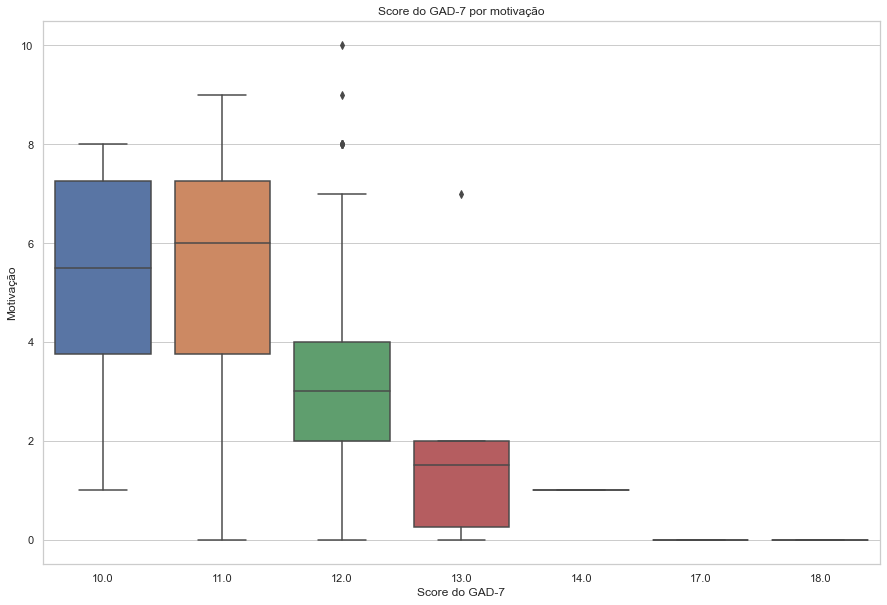

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="total score", y="motivação")
plt.title('Score do GAD-7 por motivação')
plt.xlabel('Score do GAD-7')
plt.ylabel('Motivação')
plt.show()

In [22]:
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score
62,19,792.99,3,1,2,2,2,2,2,2,9,11.0
72,19,821.99,3,2,2,2,2,2,2,2,9,12.0
121,19,722.99,3,2,2,2,2,2,2,2,10,12.0
157,19,1901.98,3,2,2,2,1,1,2,2,6,10.0
163,19,1402.99,3,2,2,2,1,1,2,2,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12.0
491,29,17336.61,5,2,2,2,2,2,2,2,1,12.0
492,33,20678.88,1,2,2,2,2,2,2,1,0,12.0
493,48,16439.16,2,2,2,2,2,2,2,1,0,12.0


In [23]:
df['classe'] = df['renda'].apply(classes)

/var/folders/j7/3v2f_9hs41gfrvgzvkcdrph00000gn/T/ipykernel_31483/2811549781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classe'] = df['renda'].apply(classes)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<AxesSubplot:xlabel='ano_curso', ylabel='motivação'>

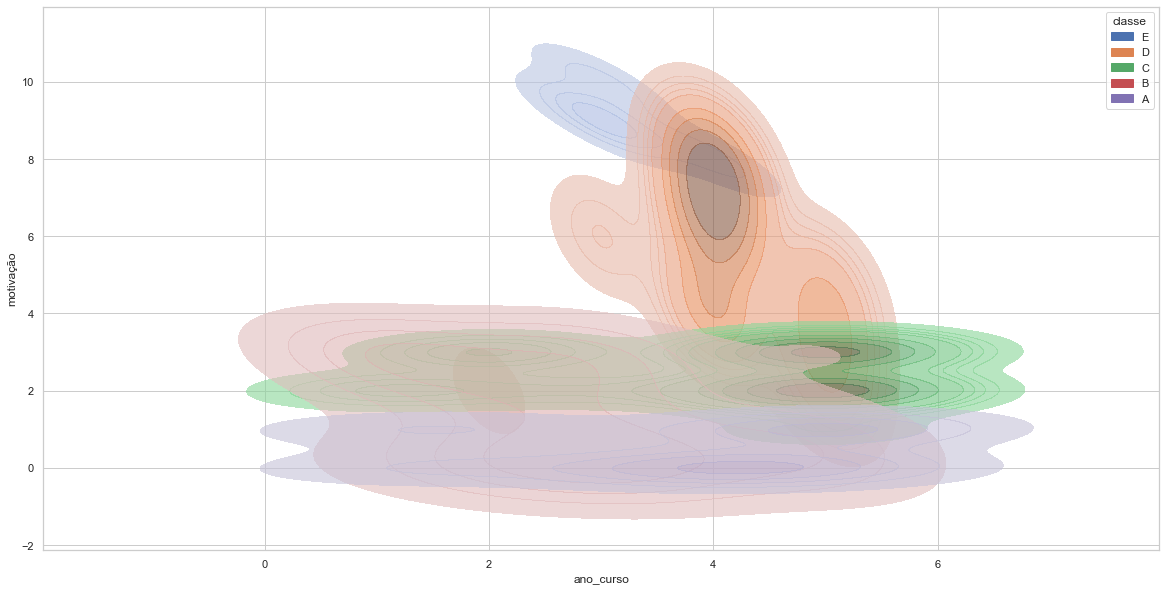

In [24]:
sns.set_style("whitegrid")

sns.kdeplot(data=df, x="ano_curso", y="motivação", hue="classe", fill=True, common_norm=True, alpha=.6, linewidth=0)


In [25]:
df

,idade,renda,ano_curso,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação,total score,classe
62,19,792.99,3,1,2,2,2,2,2,2,9,11.0,E
72,19,821.99,3,2,2,2,2,2,2,2,9,12.0,E
121,19,722.99,3,2,2,2,2,2,2,2,10,12.0,E
157,19,1901.98,3,2,2,2,1,1,2,2,6,10.0,D
163,19,1402.99,3,2,2,2,1,1,2,2,6,10.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,34,10457.14,4,2,2,2,2,2,2,2,0,12.0,A
491,29,17336.61,5,2,2,2,2,2,2,2,1,12.0,A
492,33,20678.88,1,2,2,2,2,2,2,1,0,12.0,A
493,48,16439.16,2,2,2,2,2,2,2,1,0,12.0,A


In [26]:
main = pd.read_csv("dataset.tsv", sep = "\t")
main.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,...,uf,cep,gad-1,gad-2,gad-3,gad-4,gad-5,gad-6,gad-7,motivação
0,RA55000001,Osane Inácio Pinhal Ouro,19,418.0,1,2,3,1,5,Viela Vinte e Sete de Setembro,...,SP,04235-090,1,1,1,1,1,1,1,9
1,RA55000002,Zezita Olivares Ferro Telinhos,19,279.0,1,2,3,1,2,Rua Marechal Marques Porto,...,SP,03906-020,0,1,1,1,1,1,1,10
2,RA55000003,Orleis Bilhalva Pereira Moita,19,87.0,1,1,3,1,9,Rua Vinte de Março,...,SP,02326-115,1,0,1,1,1,1,1,10
3,RA55000004,Kaiuan Félix,19,243.0,1,1,3,1,9,Rua João Pires,...,SP,03168-060,1,1,1,1,1,1,1,9
4,RA55000005,Geovan Quaresma Lameirinhas,19,348.0,1,1,3,1,6,Rua São João,...,SP,02920-050,1,1,1,1,1,1,1,9
